In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np

In [2]:
import sklearn.metrics as sm
from sklearn.preprocessing import StandardScaler, MinMaxScaler
from sklearn.cluster import KMeans

In [3]:
path_data = "/content/releve_de_1000_etudiants_series_S2.csv"
data = pd.read_csv(path_data)

In [4]:
data["Moy"] = round((data.Maths*5 + data.PC*6 +	data.SVT*6 + data.Philo*2	+ data.Fr*3	+ data.Anglais*2	+ data.HG*2) / 26, 2)

In [5]:
data = data[data["Moy"] >= 10]

In [6]:
data.shape

(924, 8)

In [7]:
# data[["Maths", "PC", "SVT", "Philo", "Fr", "Anglais", "HG", "Moy"]] = StandardScaler().fit_transform(data[["Maths", "PC", "SVT", "Philo", "Fr", "Anglais", "HG", "Moy"]])

<Figure size 2160x504 with 0 Axes>

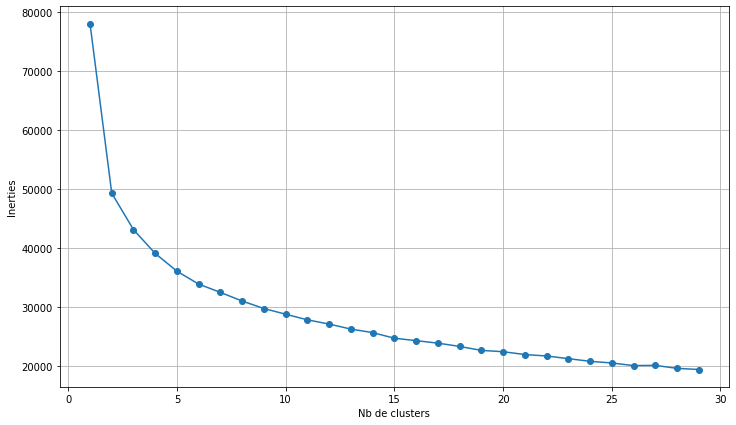

In [8]:
def optimize_k_mean(data, max_k):
  means = []
  inerties = []

  for k in range(1, max_k):
    kmeans = KMeans(n_clusters=k)
    kmeans.fit(data)

    means.append(k)
    inerties.append(kmeans.inertia_)

  plt.figure(figsize=(30, 7))
  fig = plt.subplots(figsize=(12, 7))
  plt.plot(means, inerties, 'o-')
  plt.xlabel("Nb de clusters")
  plt.ylabel('Inerties')
  plt.grid(True)
  plt.show()

optimize_k_mean(data, 30)

In [9]:
# Grid search k allant de 1 à 5

In [10]:
data = np.array(data)
data

array([[16.  , 16.  , 16.  , ..., 16.  , 16.  , 16.  ],
       [16.  , 16.  , 16.  , ..., 16.  , 16.  , 16.  ],
       [16.  , 16.  , 16.  , ..., 16.  , 16.  , 16.  ],
       ...,
       [ 6.  , 16.  , 11.  , ..., 10.  , 11.  , 11.5 ],
       [14.  , 13.  ,  8.  , ..., 14.  ,  9.  , 11.65],
       [14.  ,  6.  , 10.  , ...,  7.  , 11.  , 10.35]])

In [11]:
kmeans = KMeans(n_clusters=27)
kmeans.fit(data)

KMeans(n_clusters=27)

In [12]:
# data['kmeans_3'] = kmeans.labels_

In [13]:
for i in range(0, 27):
  print("-"*10)
  print(f"Cluster {i}")
  print("-"*10)
  for j in data[kmeans.labels_==i]:
    print(f"Indi : {j[:-1]}, Moy : {j[-1]}")

----------
Cluster 0
----------
Indi : [ 6.  8. 14. 11. 14. 15. 17.], Moy : 11.15
Indi : [ 9. 14. 11. 10. 16. 17. 13.], Moy : 12.42
Indi : [ 9. 12. 11. 13. 13. 15. 15.], Moy : 11.85
Indi : [13.  9. 10. 11. 14. 16. 12.], Moy : 11.5
Indi : [11. 12. 10.  6. 16. 12. 13.], Moy : 11.42
Indi : [13. 12. 11. 10. 16. 13. 12.], Moy : 12.35
Indi : [13. 11.  8. 14. 16. 13. 15.], Moy : 11.96
Indi : [11. 10. 11. 10. 15. 13. 14.], Moy : 11.54
Indi : [11. 11. 13.  9. 15. 14. 15.], Moy : 12.31
Indi : [ 7. 12. 11. 13. 16. 12. 13.], Moy : 11.42
Indi : [10.  9. 12. 13. 16. 13. 14.], Moy : 11.69
Indi : [ 8. 11.  7. 13. 15. 10. 16.], Moy : 10.42
Indi : [ 9. 12. 13.  6. 11. 16. 17.], Moy : 11.77
Indi : [11.  8. 10.  8. 14. 19. 12.], Moy : 10.88
Indi : [ 9. 14. 10. 12. 15. 15. 14.], Moy : 12.15
Indi : [10. 11. 13.  6. 16. 11. 16.], Moy : 11.85
Indi : [ 8. 10. 12. 11. 16. 13. 12.], Moy : 11.23
Indi : [ 6. 13. 13. 10. 14. 14. 12.], Moy : 11.54
Indi : [10. 11. 12.  8. 15. 10. 14.], Moy : 11.42
Indi : [13. 10.  6.

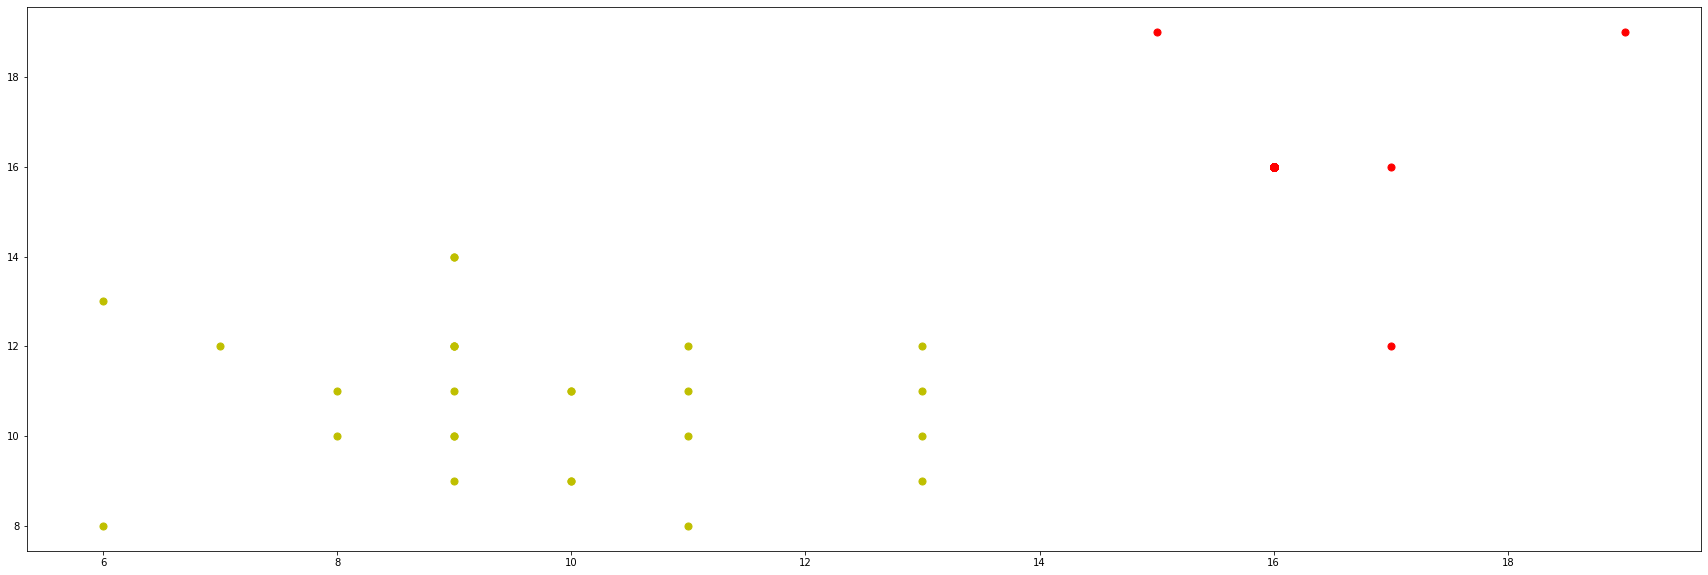

In [14]:
plt.figure(figsize=(30, 10))
plt.scatter(data[kmeans.labels_ == 0][:, 0], data[kmeans.labels_ == 0][:, 1], s=50, c="y")
plt.scatter(data[kmeans.labels_ == 1][:, 0], data[kmeans.labels_ == 1][:, 1], s=50, c="r")
# plt.scatter(data[kmeans.labels_ == 3][:, 0], data[kmeans.labels_ == 3][:, 1], s=50, c="g")
# plt.scatter(data[kmeans.labels_ == 4][:, 0], data[kmeans.labels_ == 4][:, 1], s=50, c="c")
# plt.scatter(data[kmeans.labels_ == 5][:, 0], data[kmeans.labels_ == 5][:, 1], s=50, c="m")
# plt.scatter(data[kmeans.labels_ == 6][:, 0], data[kmeans.labels_ == 6][:, 1], s=50, c="b")
# plt.scatter(data[kmeans.labels_ == 7][:, 0], data[kmeans.labels_ == 7][:, 1], s=50, c="k")
# plt.scatter(data[kmeans.labels_ == 8][:, 0], data[kmeans.labels_ == 8][:, 1], s=50, c="w")

In [18]:
kmeans.predict([[12, 16, 11, 11, 12, 14, 17, 14.15]])

array([25], dtype=int32)